# HW-02 Stata 基础命令练习

- 姓名：方鑫婷
- 学号：23327016
- 作业简介：完成 Stata 数据文件统计分析

## 调入 nlsw88.dta 数据

In [37]:
sysuse nlsw88.dta, clear

(NLSW, 1988 extract)


## 1. 统计平均值、标准差、中位数、最小值和最大值，并列表呈现出来，输出为Word 文档

In [38]:
* 输出工资、工作时间、工作年数、在职年数基本统计量，保留结果至word
estpost sum age grade wage hours ttl_exp tenure
esttab using "Table01.docx", ///
    cells("mean(fmt(2)) sd(fmt(2)) min(fmt(2)) max(fmt(2))") ///
    title("Basic Statistics") ///
    noobs replace


             |  e(count)   e(sum_w)    e(mean)     e(Var)      e(sd) 
-------------+-------------------------------------------------------
         age |      2246       2246   39.15316   9.363614   3.060002 
       grade |      2244       2244   13.09893   6.356682   2.521246 
        wage |      2246       2246   7.766949   33.12604   5.755523 
       hours |      2242       2242   37.21811   110.4419   10.50914 
     ttl_exp |      2246       2246   12.53498   21.25401   4.610208 
      tenure |      2231       2231    5.97785   30.36375   5.510331 

             |    e(min)     e(max)     e(sum) 
-------------+---------------------------------
         age |        34         46      87938 
       grade |         0         18      29394 
        wage |  1.004952   40.74659   17444.57 
       hours |         1         80      83443 
     ttl_exp |  .1153846   28.88461   28153.56 
      tenure |         0   25.91667   13336.58 
(output written to Table01.docx)
(output written to Ta

## 2. 生成新变量

In [39]:
* age2 所有观察值等于 age 变量中相应观察值的平方
gen age2 = age^2

In [40]:
* ln_wage 工资变量的自然对数
gen ln_wage = ln(wage)

In [41]:
* 工资变量 wage 与小时 hours 的比值
gen wage_hour = wage/hours

(4 missing values generated)


In [42]:
* 虚拟变量(如果某个妇女的wage大于样本的平均工资，则该妇女的dum变量取值为1，否则取值为0)
gen dum = 0
replace dum = 1 if wage > r(mean)

(0 real changes made)


## 3. 绘图
- ttl_exp 变量的直方图和密度函数图
- industry 变量取值为 1,3,5,6,7,11 时，$\ln(wage)$ 变量的密度函数图

(bin=33, start=.11538462, width=.87179486)
file His_ttl.png written in PNG format
file His_ttl.png written in PNG format
file Kendi_ttl.png written in PNG format
file Kendi_ttl.png written in PNG format


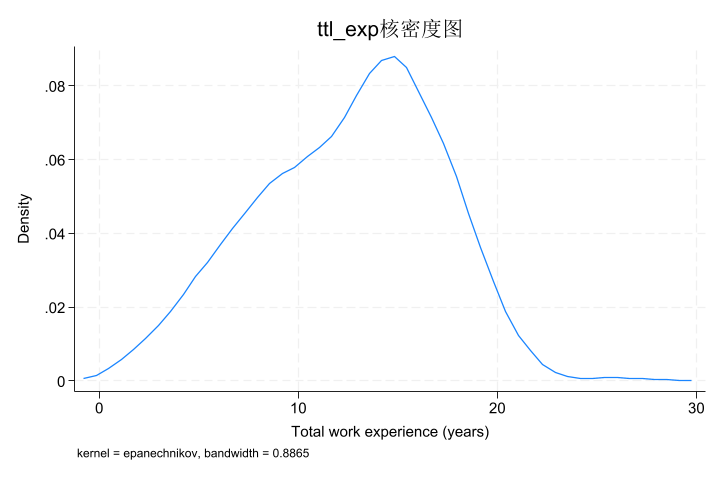

In [43]:
* ttl_exp 变量的直方图和密度函数图

* 绘制直方图
histogram ttl_exp, frequency normal title("ttl_exp直方图") 
graph export "His_ttl.png", replace

* 绘制核密度图
kdensity ttl_exp, title("ttl_exp核密度图")
graph export "Kendi_ttl.png", replace

- 样本中妇女的总工作年数平均值约为 12.5，集中分布在0到22区间，且有向右拖尾现象
- 核密度图: https://www.picgo.net/image/Kendi-ttl.NzvRHq
- 直方图: https://www.picgo.net/image/His-ttl.Nzvrmw

In [44]:
* 安装 mkdensity 命令
ssc install mkdensity, replace

checking mkdensity consistency and verifying not already installed...
all files already exist and are up to date.
all files already exist and are up to date.


file Density_ln_wage_by_Industry.png written in PNG format


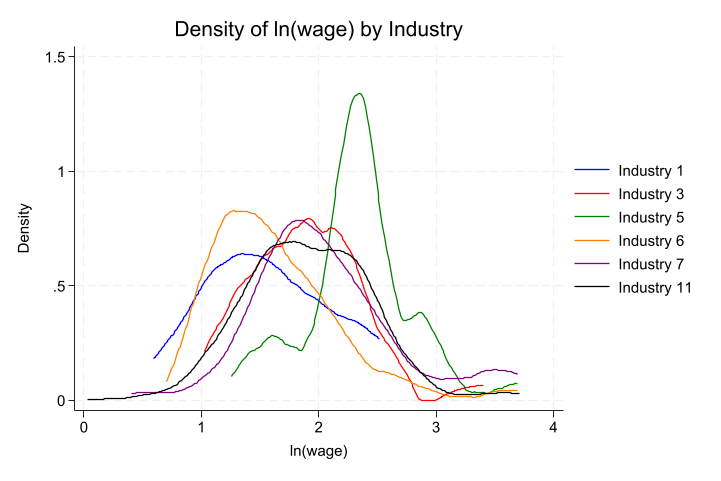

In [45]:
* 绘图
twoway ///
 (kdensity ln_wage if industry == 1,      lcolor(blue)) ///
 (kdensity ln_wage if industry == 3,      lcolor(red)) ///
 (kdensity ln_wage if industry == 5,      lcolor(green)) ///
 (kdensity ln_wage if industry == 6,      lcolor(orange)) ///
 (kdensity ln_wage if industry == 7,      lcolor(purple)) ///
 (kdensity ln_wage if industry == 11,     lcolor(black)) ///
 , legend(order(1 "Industry 1" 2 "Industry 3" 3 "Industry 5" 4 "Industry 6" 5 "Industry 7" 6 "Industry 11")) ///
   title("Density of ln(wage) by Industry") ///
   xtitle("ln(wage)") ///
   ytitle("Density")
graph export "Density_ln_wage_by_Industry.png", replace

- 行业 5 (交通运输业)的平均工资相对较高，分布也更加集中
- 行业 6 (批发零售业)的平均工资最低
- 行业 1 (农业)的工资水平最分散 

- 图片: 
    https://www.picgo.net/image/Density-ln-wage-by-Industry.NzqaK7

## 4. 统计 industry 数据

In [46]:
* 每个行业的观察值个数
tab industry


               Industry |      Freq.     Percent        Cum.
------------------------+-----------------------------------
  Ag/Forestry/Fisheries |         17        0.76        0.76
                 Mining |          4        0.18        0.94
           Construction |         29        1.30        2.24
          Manufacturing |        367       16.44       18.68
 Transport/Comm/Utility |         90        4.03       22.72
 Wholesale/Retail trade |        333       14.92       37.63
Finance/Ins/Real estate |        192        8.60       46.24
    Business/Repair svc |         86        3.85       50.09
      Personal services |         97        4.35       54.44
  Entertainment/Rec svc |         17        0.76       55.20
  Professional services |        824       36.92       92.11
  Public administration |        176        7.89      100.00
------------------------+-----------------------------------
                  Total |      2,232      100.00


```stata

               Industry |      Freq.     Percent        Cum.
------------------------+-----------------------------------
  Ag/Forestry/Fisheries |         17        0.76        0.76
                 Mining |          4        0.18        0.94
           Construction |         29        1.30        2.24
          Manufacturing |        367       16.44       18.68
 Transport/Comm/Utility |         90        4.03       22.72
 Wholesale/Retail trade |        333       14.92       37.63
Finance/Ins/Real estate |        192        8.60       46.24
    Business/Repair svc |         86        3.85       50.09
      Personal services |         97        4.35       54.44
  Entertainment/Rec svc |         17        0.76       55.20
  Professional services |        824       36.92       92.11
  Public administration |        176        7.89      100.00
------------------------+-----------------------------------
                  Total |      2,232      100.00
```
- 行业 1 (农业)观察值:17
- 行业 2 (矿业)观察值:4
- 行业 3 (建筑业)观测值:29
- 行业 4 (制造业)观察值:367
- 行业 5 (交通运输业)观察值:333
- 行业 6 (金融业)观察值:192
- 行业 7 (商业)观察值:86
- 行业 8 (个人服务业)观察值:97
- 行业 9 (娱乐业)观察值:17
- 行业 10 (专业服务业)观察值:824
- 行业 11 (公共行政)观察值:176
      

In [47]:
* 各个行业妇女的平均工资、平均工作时数、平均年龄
tabstat wage hours age, by(industry) stat(mean) columns(variables)



Summary statistics: Mean
Group variable: industry (Industry)

        industry |      wage     hours       age
-----------------+------------------------------
Ag/Forestry/Fish |  5.621121  34.47059  39.94118
          Mining |  15.34959        40     37.25
    Construction |  7.564934  35.65517  38.62069
   Manufacturing |  7.501578  40.89373   38.9891
Transport/Comm/U |  11.44335  39.85556  39.27778
Wholesale/Retail |  6.125897  35.24699  39.28829
Finance/Ins/Real |  9.843174  38.51563  38.82813
Business/Repair  |   7.51579  33.15116  38.73256
Personal service |  4.401093  32.09375  39.23711
Entertainment/Re |  6.724409  34.35294  40.11765
Professional ser |  7.871186  36.71655  39.23908
Public administr |  9.148407  38.54545  39.15909
-----------------+------------------------------
           Total |  7.783463  37.23205  39.14606
------------------------------------------------


- 不同行业妇女的平均工资、平均工作时数、平均年龄
```stata
        industry |      wage     hours       age
-----------------+------------------------------
Ag/Forestry/Fish |  5.621121  34.47059  39.94118
          Mining |  15.34959        40     37.25
    Construction |  7.564934  35.65517  38.62069
   Manufacturing |  7.501578  40.89373   38.9891
Transport/Comm/U |  11.44335  39.85556  39.27778
Wholesale/Retail |  6.125897  35.24699  39.28829
Finance/Ins/Real |  9.843174  38.51563  38.82813
Business/Repair  |   7.51579  33.15116  38.73256
Personal service |  4.401093  32.09375  39.23711
Entertainment/Re |  6.724409  34.35294  40.11765
Professional ser |  7.871186  36.71655  39.23908
Public administr |  9.148407  38.54545  39.15909
-----------------+------------------------------
           Total |  7.783463  37.23205  39.14606
------------------------------------------------
```

In [48]:
* 统计不同行业中白种人、黑种人和其他人种的比例
tab industry race, row


+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

                      |               Race
             Industry |     White      Black      Other |     Total
----------------------+---------------------------------+----------
Ag/Forestry/Fisheries |        13          4          0 |        17 
                      |     76.47      23.53       0.00 |    100.00 
----------------------+---------------------------------+----------
               Mining |         4          0          0 |         4 
                      |    100.00       0.00       0.00 |    100.00 
----------------------+---------------------------------+----------
         Construction |        24          4          1 |        29 
                      |     82.76      13.79       3.45 |    100.00 
----------------------+---------------------------------+----------
        Manufacturing |       229        134          4 |       367 
                  

- 不同行业人种比例
```stata
                      |               Race
             Industry |     White      Black      Other |     Total
----------------------+---------------------------------+----------
Ag/Forestry/Fisheries |     76.47      23.53       0.00 |    100.00 
----------------------+---------------------------------+----------
               Mining |    100.00       0.00       0.00 |    100.00 
----------------------+---------------------------------+----------
         Construction |     82.76      13.79       3.45 |    100.00 
----------------------+---------------------------------+----------
        Manufacturing |     62.40      36.51       1.09 |    100.00 
----------------------+---------------------------------+----------
Transport/Comm/Utilit |     68.89      30.00       1.11 |    100.00 
----------------------+---------------------------------+----------
Wholesale/Retail trad |     80.18      19.82       0.00 |    100.00 
----------------------+---------------------------------+----------
Finance/Ins/Real esta |     85.94      13.02       1.04 |    100.00 
----------------------+---------------------------------+----------
  Business/Repair svc |     74.42      23.26       2.33 |    100.00 
----------------------+---------------------------------+----------
    Personal services |     52.58      46.39       1.03 |    100.00 
----------------------+---------------------------------+----------
Entertainment/Rec svc |     82.35      17.65       0.00 |    100.00 
----------------------+---------------------------------+----------
Professional services |     74.76      23.91       1.33 |    100.00 
----------------------+---------------------------------+----------
Public administration |     67.05      30.68       2.27 |    100.00 
```


## 5. 定义人种虚拟变量

In [49]:
* 设定虚拟变量值
label define racelb 1 "白种人" 2 "黑种人" 3 "其它"
label values race racelb

- 1 —— “白种人”
- 2 —— “黑种人”
- 3 —— “其它”

## 6．续别变量转类别变量

In [50]:
* 产生一个新变量 G_age
gen G_age = .
replace G_age = 1 if age <= 37
replace G_age = 2 if age > 37 & age <= 42
replace G_age = 3 if age > 42

(2,246 missing values generated)
(795 real changes made)
(1,043 real changes made)
(408 real changes made)


In [51]:
* 为 G_age 变量添加 “数字-文字”对应表
label define G_agelbl 1 "37岁以下" 2 "38到42岁之间" 3 "43岁以上"
label values G_age G_agelbl

* 查看结果
tab G_age


       G_age |      Freq.     Percent        Cum.
-------------+-----------------------------------
    37岁以下 |        795       35.40       35.40
38到42岁之间 |      1,043       46.44       81.83
    43岁以上 |        408       18.17      100.00
-------------+-----------------------------------
       Total |      2,246      100.00


```stata
       G_age |      Freq.     Percent        Cum.
-------------+-----------------------------------
    37岁以下 |        795       35.40       35.40
38到42岁之间 |      1,043       46.44       81.83
    43岁以上 |        408       18.17      100.00
-------------+-----------------------------------
       Total |      2,246      100.00
```

## 7. 工资分布

file Density_race.png written in PNG format


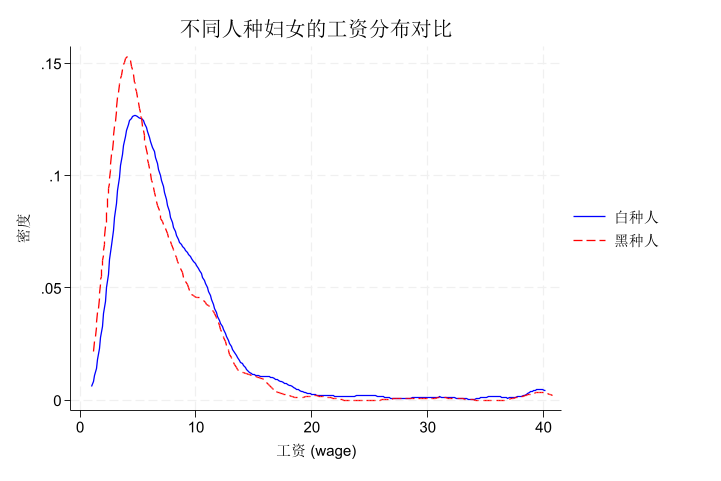

In [52]:
* 在一张图中绘制白人和黑人妇女的工资的核密度函数图
twoway ///
    (kdensity wage if race == 1, lcolor(blue) lpattern(solid)) ///
    (kdensity wage if race == 2, lcolor(red)  lpattern(dash)) ///
, legend(order(1 "白种人" 2 "黑种人")) ///
  title("不同人种妇女的工资分布对比") ///
  xtitle("工资 (wage)") ///
  ytitle("密度")
graph export "Density_race.png", replace

- 黑人妇女的平均工资更低
- 黑人妇女工资分布更集中
- 无论黑人还是白人妇女，其工资分布均向右拖尾

- 图片: https://www.picgo.net/image/Density-race.NzvXaA

(8 observations deleted)
(file 工资比较图表.png not found)
(file 工资比较图表.png not found)
file 工资比较图表.png saved as .gph format
file 工资比较图表.png saved as .gph format


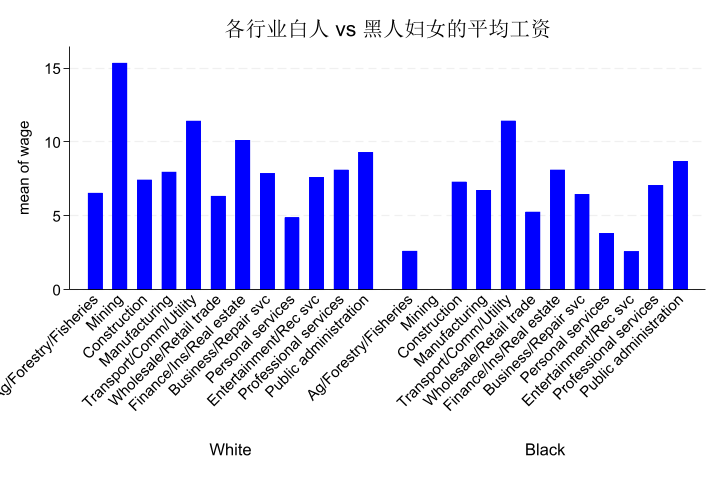

In [61]:
* 计算每个行业中白人和黑人妇女的平均工资
collapse (mean) wage, by(industry race)

* 绘制柱状图
drop if race == 3
graph bar wage, over(industry, label(angle(45))) over(race) ///
    bar(1, bcolor(blue)) bar(2, bcolor(red)) ///
    legend(label(1 "白人") label(2 "黑人")) ///
    title("各行业白人 vs 黑人妇女的平均工资") ///
    saving("工资比较图表.png", replace)



- 总体来看，各个行业白人妇女的平均工资更高
- 黑人妇女几乎不从事采矿业
- 白人妇女中，采矿业的平均工资最高
- 黑人妇女中，交通运输业的平均工资最高

- 图片: https://www.picgo.net/image/image.NzP8sk

## 8. 基本回归分析

In [54]:
* 重新调入完整的数据
sysuse nlsw88.dta, clear 


(NLSW, 1988 extract)


In [55]:
* 生成交互项及解释变量和控制变量
gen ln_hours = ln(hours)

gen age2 = age^2

gen ln_wage = ln(wage)

(4 missing values generated)


In [56]:
* 生成各行业的平均 ln(wage) 到新变量 avg_ln_wage
egen avg_ln_wage = mean(ln_wage), by(industry)

In [57]:
* 使用 regress 命令估计各个行业的 (industry) 的平均工资
regress avg_ln_wage ttl_exp tenure age2 i.industry



      Source |       SS           df       MS      Number of obs   =     2,217
-------------+----------------------------------   F(14, 2202)     =         .
       Model |  84.3665299        14  6.02618071   Prob > F        =         .
    Residual |           0     2,202           0   R-squared       =    1.0000
-------------+----------------------------------   Adj R-squared   =    1.0000
       Total |  84.3665299     2,216  .038071539   Root MSE        =         0

------------------------------------------------------------------------------
 avg_ln_wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     ttl_exp |  -3.24e-18          .        .       .            .           .
      tenure |  -8.57e-19          .        .       .            .           .
        age2 |  -6.00e-19          .        .       .            .           .
             |
    industry |
     Mining  |   .78


Predictive margins                                       Number of obs = 2,217
Model VCE: OLS

Expression: Linear prediction, predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    industry |
Ag/Forest~s  |    1.58039          .        .       .            .           .
     Mining  |   2.362278          .        .       .            .           .
Construct~n  |   1.884193          .        .       .            .           .
Manufactu~g  |    1.85234          .        .       .            .           .
Transport~y  |   2.328451          .        .       .            .           .
Wholesale..  |   1.621419          .        .       .            .           .
Finance/I..  |   2.054505          .        .       .            .           .
Business/..  |   1

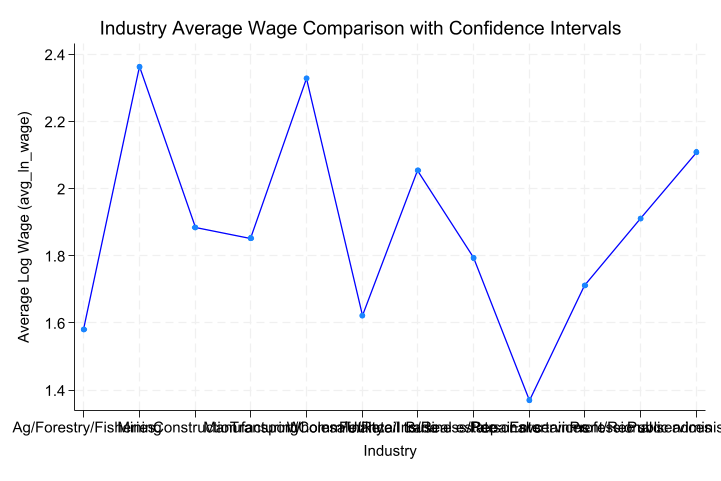

In [58]:
* 运行回归并使用 margins 显示按行业的预测平均值及 95% 置信区间
margins industry
marginsplot, xdimension(industry) plot1opts(lwidth(medium) lcolor(blue)) ///
    ytitle("Average Log Wage (avg_ln_wage)") ///
    title("Industry Average Wage Comparison with Confidence Intervals")
graph export "Marginsplot_industry1.png", replace

- 图片 1: https://www.picgo.net/image/Marginsplot-industry1.NzJte2
- 图片 2: https://www.picgo.net/image/NzvTti

In [59]:
* 使用 regress 命令估计各个行业的 (industry) 的平均工资 (以行业1为基准)
regress avg_ln_wage ttl_exp tenure age2 ib1.industry


      Source |       SS           df       MS      Number of obs   =     2,217
-------------+----------------------------------   F(14, 2202)     =         .
       Model |  84.3665299        14  6.02618071   Prob > F        =         .
    Residual |           0     2,202           0   R-squared       =    1.0000
-------------+----------------------------------   Adj R-squared   =    1.0000
       Total |  84.3665299     2,216  .038071539   Root MSE        =         0

------------------------------------------------------------------------------
 avg_ln_wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     ttl_exp |  -3.24e-18          .        .       .            .           .
      tenure |  -8.57e-19          .        .       .            .           .
        age2 |  -6.00e-19          .        .       .            .           .
             |
    industry |
     Mining  |   .78

```stata
 avg_ln_wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     ttl_exp |  -3.24e-18          .        .       .            .           .
      tenure |  -8.57e-19          .        .       .            .           .
        age2 |  -6.00e-19          .        .       .            .           .
             |
    industry |
     Mining  |   .7818886          .        .       .            .           .
Construct~n  |   .3038037          .        .       .            .           .
Manufactu~g  |   .2719505          .        .       .            .           .
Transport~y  |   .7480618          .        .       .            .           .
Wholesale..  |   .0410293          .        .       .            .           .
Finance/I..  |    .474115          .        .       .            .           .
Business/..  |   .2130015          .        .       .            .           .
Personal ..  |  -.2105024          .        .       .            .           .
Entertain..  |    .131215          .        .       .            .           .
Professio..  |    .330309
Public ad..  |   .5280107          .        .       .            .           .
             |
       _cons |    1.58039          .        .       .            .           .
------------------------------------------------------------------------------
```


------------------------------------------------------------------------------


### 根据如下模型进行分析
- 模型：

    $ \quad ln(wage) = a_i + a_j + \beta_1 ln(hours) + \beta_2 Black + \beta_3 Black \times ln(hours) + \gamma Controls + u$

In [60]:
* 对控制变量进行设定
capture drop dum_*
* 如果某个妇女已婚, 则该妇女的 dum_mar 变量取值为1, 否则取值为0
gen dum_mar = (married == 1)
* 如果某个妇女大学毕业, 则该妇女的 dum_coll 变量取值为1, 否则取值为0
gen dum_coll = (coll == 1)
gen dum_coll = (coll == 1)
* 如果某个妇女来自南方, 则该妇女的 dum_south 变量取值为1, 否则取值为0
gen dum_south = (south == 1)
* 如果某个妇女来自中心城市, 则该妇女的 dum_city 变量取值为1, 否则取值为0
gen dum_city = (c_city == 1)
* 如果某个妇女住在smsa, 则该妇女的 dum_smsa 变量取值为1, 否则取值为0
gen dum_smsa = (smsa == 1)
* 如果某个妇女为工会成员, 则该妇女的 dum_uni 变量取值为1, 否则取值为0
gen dum_uni = (union == 1)

variable dum_coll already defined
r(110);


In [ ]:
* 对不同行业的工资进行回归分析
* regress 估计
regress ln_wage ln_hours i.race##c.ln_hours i.industry i.occupation ttl_exp tenure age age2 dum_* grade

note: ln_hours omitted because of collinearity.

      Source |       SS           df       MS      Number of obs   =     2,207
-------------+----------------------------------   F(39, 2167)     =     42.79
       Model |  313.975771        39   8.0506608   Prob > F        =    0.0000
    Residual |  407.694266     2,167   .18813764   R-squared       =    0.4351
-------------+----------------------------------   Adj R-squared   =    0.4249
       Total |  721.670037     2,206  .327139636   Root MSE        =    .43375

------------------------------------------------------------------------------
     ln_wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    ln_hours |   .0538227    .024652     2.18   0.029     .0054787    .1021668
             |
        race |
      Black  |  -.3322292   .2517412    -1.32   0.187    -.8259086    .1614503
      Other  |   .9543212   .7048443     1.35   0.1

In [ ]:
* areg 估计
areg ln_wage ln_hours i.race##c.ln_hours ttl_exp tenure age age2 dum_* grade, absorb(industry)

note: ln_hours omitted because of collinearity.

Linear regression, absorbing indicators             Number of obs     =  2,211
Absorbed variable: industry                         No. of categories =     12
                                                    F(16, 2183)       =  59.07
                                                    Prob > F          = 0.0000
                                                    R-squared         = 0.3813
                                                    Adj R-squared     = 0.3736
                                                    Root MSE          = 0.4525

------------------------------------------------------------------------------
     ln_wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    ln_hours |   .0979468   .0251411     3.90   0.000     .0486438    .1472499
             |
        race |
      Black  |  -.4121405   .2565792    -1.61   0.1

In [ ]:
* reghdfe 估计
reghdfe ln_wage ln_hours i.race##c.ln_hours ttl_exp tenure age age2 dum_* grade, absorb(industry) vce(cluster industry)

(MWFE estimator converged in 1 iterations)
note: ln_hours omitted because of collinearity
> clusters

HDFE Linear regression                            Number of obs   =      2,211
Absorbing 1 HDFE group                            F(  16,     11) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.3813
                                                  Adj R-squared   =     0.3736
                                                  Within R-sq.    =     0.3021
Number of clusters (industry) =         12        Root MSE        =     0.4525

                              (Std. err. adjusted for 12 clusters in industry)
------------------------------------------------------------------------------
             |               Robust
     ln_wage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+---------------------------------------------------------

- $\hat{\beta}_1$ 表示 ln(hours) 对工资 ln(wage) 的边际效应
- $\hat{\beta}_3$ > 0，这意味着黑人妇女的工作时间增加对工资的正向影响，比其他人种更强

- 模型整体表现
- - 样本量：2,207个观测值
- - R² = 0.4351：模型解释了工资对数变异的43.51%，在社会科学研究中属于可接受水平
- - F检验p值=0.0000：模型整体高度显著
- - 调整R² = 0.4249：考虑变量数量后的解释力

- 主要显著变量分析
- - 教育相关（高度显著）
- - - 受教育年限（grade）：系数0.041，每多一年教育使工资提高约4.2%
- - 工作经验
- - - 总工作经验（ttl_exp）：系数0.021，显著正相关
- - - 当前职位任期（tenure）：系数0.010，显著正相关
- - 地域因素
- - - 南部地区（dum_south）：系数-0.081，南部工资低约7.8%
- - - 大城市（dum_smsa）：系数0.191，大城市工资高约21%
- - 行业差异（以农业为参照）
- - - 运输业：系数0.353，工资显著较高
- - - 采矿业：系数0.471，在10%水平上显著
- - 职业类型（以Professional/Technical为参照）
- - - 多数职业系数为负且显著：
- - - - Sales：-27.5%
- - - - Operatives：-39.9%
- - - - Transport：-47.9%
- - - - Laborers：-39.9%

- 不显著变量
- - 年龄和年龄平方：不显著，可能被工作经验变量吸收
- - 种族变量：主效应和交互项均不显著